<a href="https://colab.research.google.com/github/jamstanleyambe/End-to-End-Dog-Breed-Identification/blob/main/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐈 End-to-End multil-class Dog Breed Classification

This NoteBook builds an end to end multil-class image classifier using TensorFlow and TensorFlow Hub.

## 1. Problem


> Identifying the bread of a dog given an image of a dog.
if i can take a picture of any dog i want to know what kind of the breed the Dog is.

## 2. Data

>The data we are using is coming from Kaggle dog breed identification competition

## 3. Evaluation

> The Evaluation is a file with prediction probability of each dog breed of each test image

## 4. Features

>Some information about the data:
 * We are dealing with images **(unstructured data)** so it probably best to use deep learning/transfer learning.
 * There are 120 breeds of dogs (this means thee are 120 different classes).
 * There are around 10000 + images in the traing set ( this images has lable beacuse we are using them for the trainig)
 * Tehre are around 10000 + images in the test set, (this images has no lable because we want to predict them)


In [58]:
# import Tensorflow into our colab

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import random
from IPython.display import Image
print("tensorflow_hub", hub.__version__)
print("tensorflow", tf.__version__)

tensorflow_hub 0.16.1
tensorflow 2.17.1


# Getting Our workPace Ready
* import Tensorflow
* import Tensorflow HandleData
* Make sure we're using GPU


In [59]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


# getting our data ready (turning into Tensorns)
With all machine learning models, our data has to be in numerical format. So that well be doing first Turning our images into Tensors (numerical representation)

Lets start by accesssing our data and checking out the labels

In [60]:
# Checkout the Labels of our data
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/dog-breed-identification/labels.csv")
labels_csv.head(),

(                                 id             breed
 0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
 1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
 2  001cdf01b096e06d78e9e5112d419397          pekinese
 3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
 4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever,)

In [61]:
print(labels_csv.shape)
print(labels_csv.info())
print(labels_csv.describe())

(10222, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB
None
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


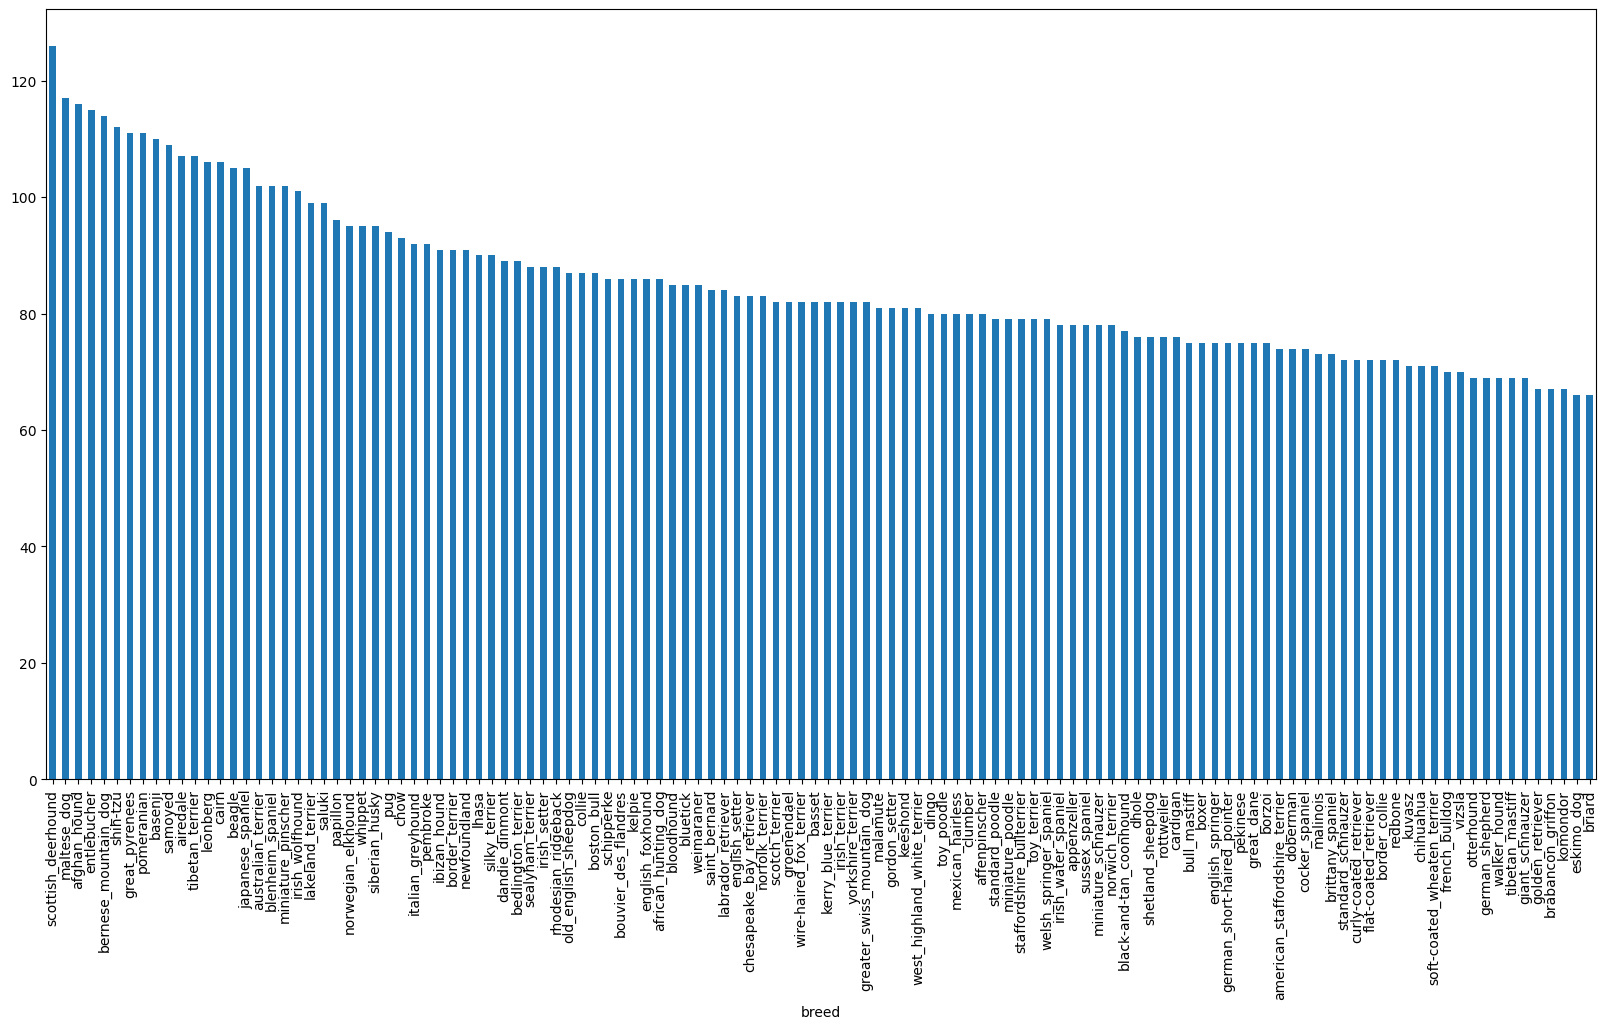

In [62]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10));

In [63]:
labels_csv['breed'].value_counts().median()

82.0

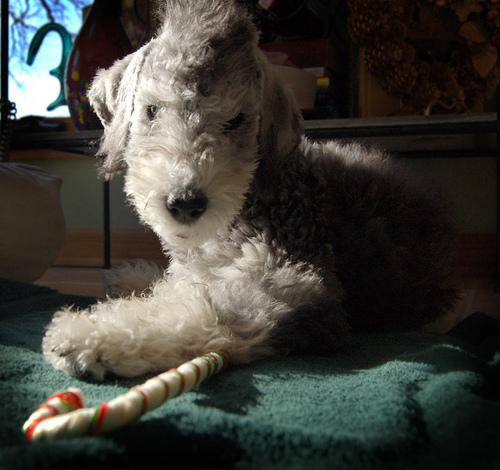

In [64]:
# lets view and image
Image("/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg")

### Getting images and their labels
Let's get a list of all images file and pathnames

In [65]:
#create path name for all image ID
filenames = ['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/' + image_id + '.jpg' for image_id in labels_csv['id']]

In [66]:
filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-

In [67]:
len(labels)

10222

In [68]:
len(filenames)

10222

In [69]:
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [70]:
len(labels),

(10222,)

In [71]:
len(filenames)

10222

In [72]:
if len(labels) == len(filenames):
 print("labels match actual amount of files !!! ")
else:
  print("labels do not match actual amount of files")

labels match actual amount of files !!! 


In [73]:
# Find the unique label Value
unique_breeds = np.unique(labels)
len(unique_breeds)

120